In [1]:
# Импорт библиотек numpy и matplotlib:
import numpy as np
import matplotlib.pyplot as plt

# Инициализация основной функции
def z_xy(points_x, points_y=None, log=False):
    # Присвоение кол-ва точек для y:
    if points_y is None:
        points_y = points_x
        
    # Интервалы значений x и y:
    x, y = np.meshgrid(np.linspace(0, 10, points_x), \
                       np.linspace(0.0625, 10, points_y))
    
    # Функции y1(x) и y2(y):
    y1 = (x**3 + 3 * x**2) / 4 - 5
    y2 = 2 / np.sin(0.1 * y)

    # Функция z(x,y):
    z = y1 * y2

    # Полулогарифмический масштаб:
    if log:
        y = np.where(np.abs(y) > 0.01, y, 0.01)
        z = y1 * y2
        log_y = np.log10(y)
        return x, log_y, y, z
    
    return x, y, z


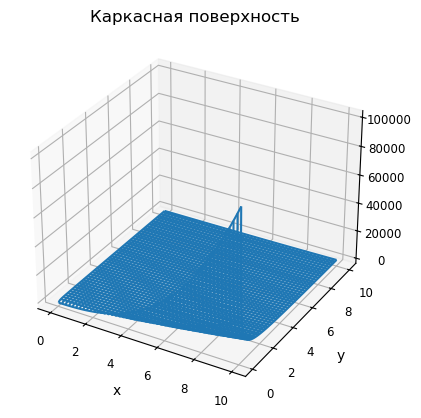

In [2]:
# Подпрограмма для построения графика функции по формуле:
def surface_print(color=False):
    points = 500 # кол-во точек

    # Значения переменных функции:
    x, y, z = z_xy(points)

    # Объект fig для построения графика:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d") # сетка и проекция

    # Выбор стиля графика:
    if color:
        # График с использованием цветовой шкалы:
        surf = ax.plot_surface(x, y, z, cmap="viridis") # расчет данных
        fig.colorbar(surf) # раскраска по color map
        ax.set_title("График поверхности с цветовой шкалой") # заголовок
    else:
        # Обычный график:
        ax.plot_wireframe(x, y, z) 
        ax.set_title("Каркасная поверхность") 
    
    # Подписи осей и вывод графика:
    plt.tick_params(axis="both", labelsize=8.5)
    plt.xlabel("x") 
    plt.ylabel("y") 
    plt.show() 

surface_print()

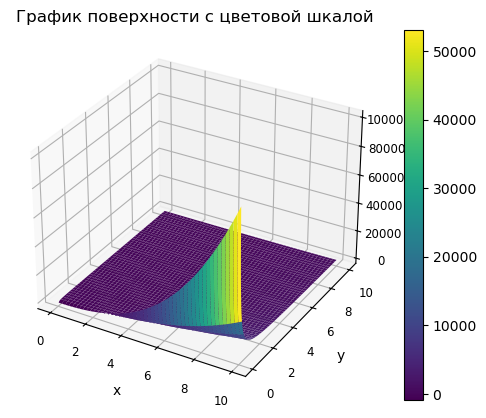

In [3]:
surface_print(True)

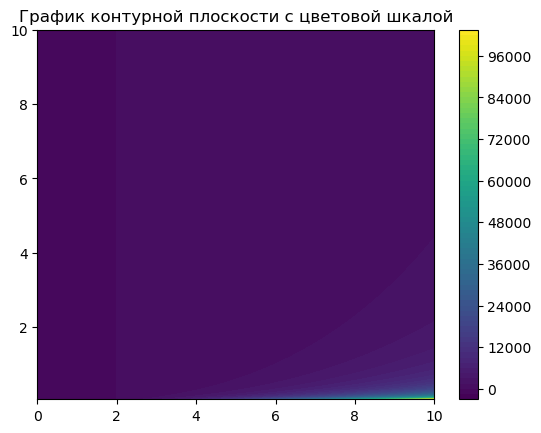

In [4]:
# Подпрограмма для построения графика методом контурной плоскости:
def plane_print():
    points = 500 
    x, y, z = z_xy(points)
    
    color_levels = 100 # кол-во разных цветов 
    plt.contourf(x, y, z, color_levels) # расчет данных с цветами
    plt.title("График контурной плоскости с цветовой шкалой") 
    plt.colorbar()

plane_print()

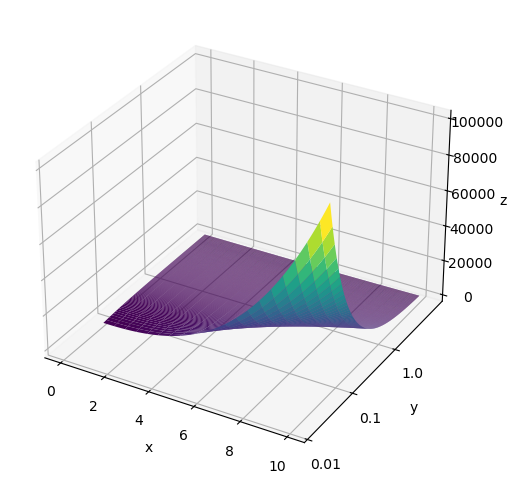

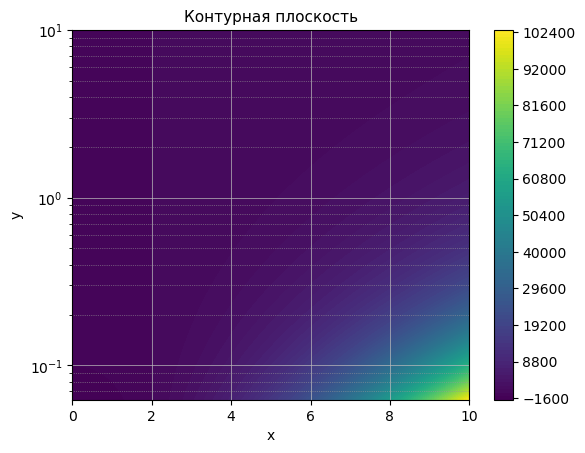

In [46]:
# Подпрограмма для построения графиков в полулогарифмическом масштабе:
def log_graphics_print():
    points_x = 100 # кол-во точек по оси x 
    points_y = 5000 # кол-во точек по оси y 
    
    x, log_y, y, z = z_xy(points_x, points_y, True)
    
    # График поверхности в полулог. масштабе (по оси у): 
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, 
    figsize=(9, 6)) 
    surf = ax.plot_surface(x, log_y, z, cmap="viridis", 
                              rstride=5, cstride=5) 
    # Метки по осям: 
    y_ticks = np.array([0.01, 0.1, 1]) 
    ax.set_yticks(np.log10(y_ticks)) 
    ax.set_yticklabels(y_ticks) 

    # Подписи осей:
    ax.set_xlabel("x") 
    ax.set_ylabel("y") 
    ax.set_zlabel("z") 
    #plt.tight_layout()
    plt.show() # график поверхности 
     
    # График конт. плоскости в полулог. масштабе (по оси у): 
    color_levels = 120 
    CS = plt.contourf(x, y, z, color_levels)

    # Подробная цветовая шкала: 
    cbar = plt.colorbar(CS) 
    ticks = np.linspace(z.min(), z.max()-1, num=10+1) 
    cbar.set_ticks(ticks) 

    # Подписи к графику:
    plt.title("Контурная плоскость", fontsize=11) 
    plt.xlabel("x") 
    plt.ylabel("y") 
    plt.yscale("log") # лог. масштаб по оси у 
    
    # Нанесение сетки: 
    plt.grid(which = "major", color = "#bbbbbb", 
             linewidth = 0.5) 
    plt.grid(which = "minor", color = "#999999", 
             linewidth = 0.5, 
             linestyle = ":")
    
    plt.show()
    
log_graphics_print()

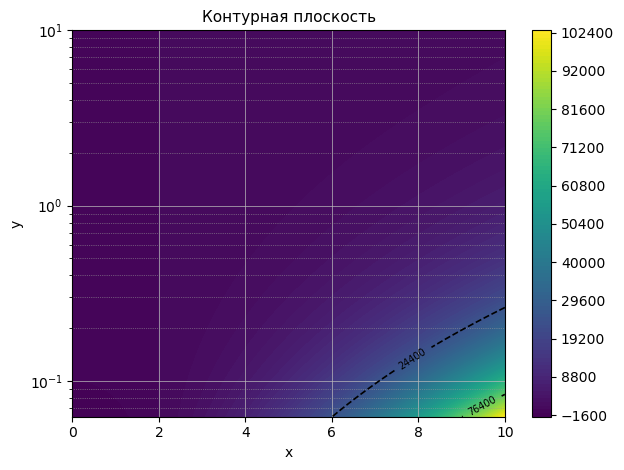

In [50]:
points_x = 100 # кол-во точек по оси x 
points_y = 5000 # кол-во точек по оси y 

x, log_y, y, z = z_xy(points_x, points_y, True)

z_min = np.min(z)
z_max = np.max(z)

# График конт. плоскости в полулог. масштабе (по оси у): 
color_levels = 120 
CS = plt.contourf(x, y, z, color_levels)

# Подробная цветовая шкала: 
cbar = plt.colorbar(CS) 
ticks = np.linspace(z_min, z_max-1, num=10+1) 
cbar.set_ticks(ticks) 

# Подписи к графику:
plt.title("Контурная плоскость", fontsize=11) 
plt.xlabel("x") 
plt.ylabel("y") 
plt.yscale("log") # лог. масштаб по оси у 

# Нанесение сетки: 
plt.grid(which = "major", color = "#bbbbbb", 
         linewidth = 0.5) 
plt.grid(which = "minor", color = "#999999", 
         linewidth = 0.5, 
         linestyle = ":")

# Расчёт уровней:
delta = z_max - z_min
level_low = z_min + 0.25 * delta
level_high = z_max - 0.25 * delta

# Линии уровня:
CS_low = plt.contour(x, y, z, levels=[level_low],
                     colors="black", linewidths=1.2, linestyles="dashed")
CS_high = plt.contour(x, y, z, levels=[level_high],
                      colors="black", linewidths=1.2, linestyles="solid")

# Подписи на линиях уровней:
plt.clabel(CS_low, fmt={level_low: f"{level_low:.0f}"},
           fontsize=7, inline=True, manual=[(x[100, 70], y[100, 70])])

plt.clabel(CS_high, fmt={level_high: f"{level_high:.0f}"},
           fontsize=7, inline=True, manual=[(x[100, 81], y[100, 81])])

plt.tight_layout()
plt.show()